In [45]:
import argparse
from os import makedirs
from os.path import join

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.ndimage import imread
from scipy.misc import imsave

In [46]:
im_path = '/opt/data/datasets/detection/pets/images_subset/animal_montage.jpg'

(1074, 1478, 3)


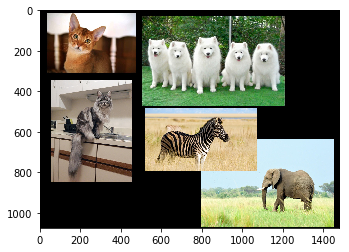

In [47]:
im = imread(im_path)
print(im.shape)
plt.imshow(im)

In [48]:
def pad_image(im, window_size):
    row_pad = window_size - (im.shape[0] % window_size)
    col_pad = window_size - (im.shape[1] % window_size)
    pad_width = (
        (row_pad // 2, row_pad - (row_pad // 2)),
        (col_pad // 2, col_pad - (col_pad // 2)),
        (0, 0)
    )
    pad_im = np.pad(im, pad_width, mode='constant')
    return pad_im

(1200, 1800, 3)


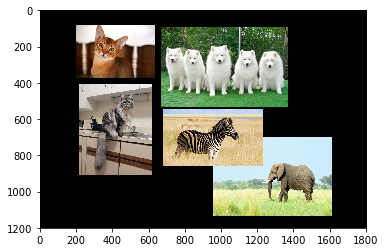

In [54]:
window_size = 600
pad_im = pad_image(im, window_size)
print(pad_im.shape)
plt.imshow(pad_im)

In [69]:
boxes = []
for i in range(0, pad_im.shape[0], window_size // 2):
    for j in range(0, pad_im.shape[1], window_size // 2):
        box = (i, j)
        boxes.append(box)

(0, 600)
(0, 900)
(0, 1200)
(0, 1500)
(0, 1800)
(0, 2100)
(300, 600)
(300, 900)
(300, 1200)
(300, 1500)
(300, 1800)
(300, 2100)
(600, 600)
(600, 900)
(600, 1200)
(600, 1500)
(600, 1800)
(600, 2100)
(900, 600)
(900, 900)
(900, 1200)
(900, 1500)
(900, 1800)
(900, 2100)


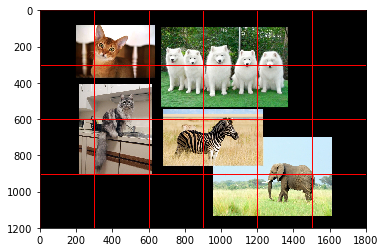

In [70]:
from matplotlib.patches import Rectangle
import time

plt.figure()
plt.imshow(pad_im)
currentAxis = plt.gca()

for box in boxes:
    print((box[0], box[1] + window_size))
    currentAxis.add_patch(
        Rectangle((box[1], box[0]), window_size, window_size, 
                  fill=None, alpha=1, color='red'))